In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
data = [1,2,3,4,5,6]
np.mean(data)

3.5

In [4]:
df = sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
np.median(data)

3.5

In [8]:
data = [1,2,3,4,5,100]
np.mean(data)

19.166666666666668

In [9]:
np.median(data)

3.5

* mean is affected by outlier but median doesn't

In [10]:
data = [1,2,3,4,4,4,5,6]

In [11]:
# mode 
dic = {i: data.count(i) for i in data }

In [13]:
max(dic.keys, key=dic.values)

TypeError: 'builtin_function_or_method' object is not iterable

In [16]:
import statistics
statistics.mode(data)

4

In [14]:
np.percentile(data, [25])

array([2.75])

* 25% data lies below 2.75

In [17]:
np.percentile(data, [25,50,75,80,90])

array([2.75, 4.  , 4.25, 4.6 , 5.3 ])

In [22]:
data=[1,2,3,4,5,6,500,-500]
data

[1, 2, 3, 4, 5, 6, 500, -500]

<Axes: >

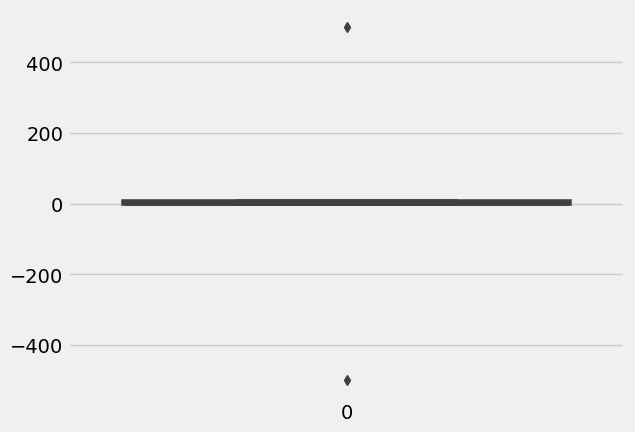

In [23]:
sns.boxplot(data)

In [25]:
# centre of dispersion
data = [1,3,6,8,9,45,32,12,2,9]
np.var(data)

185.60999999999996

In [26]:
np.std(data)

13.623876100434853

In [27]:
statistics.variance(data)  # by default it calculate sample variance -> n-1

206.23333333333332

In [28]:
statistics.pvariance(data) # population variance

185.61

In [29]:
# std deviation
import math
math.sqrt(statistics.pvariance(data))

13.623876100434854

In [30]:
math.sqrt(statistics.variance(data))

14.360826345769011

In [32]:
# relationship b/w 2 features
# correlation & covariance
df[['total_bill','tip','size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [37]:
corrl = df.corr(numeric_only=True)
corrl

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

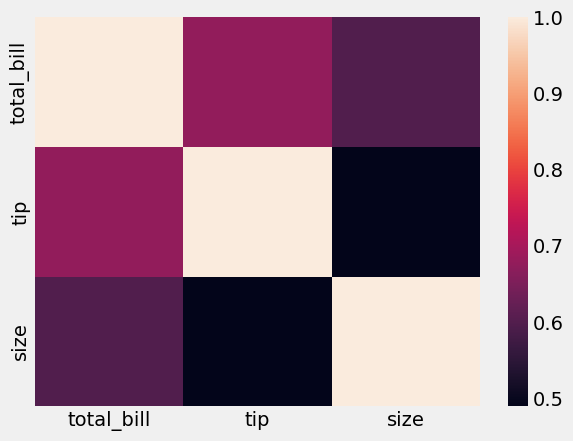

In [38]:
sns.heatmap(corrl)

In [39]:
covr = df.cov(numeric_only=True)
covr

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


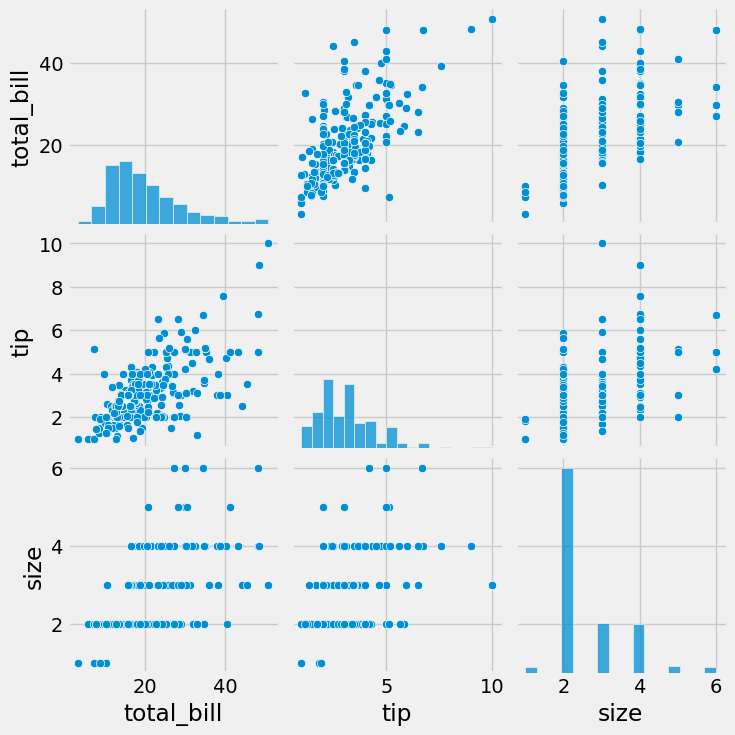

In [40]:
sns.pairplot(df)

## Central Limit Theorem

In [43]:
population = np.random.randint(10,20,50)
population

array([14, 11, 19, 12, 19, 18, 18, 11, 17, 19, 13, 12, 18, 12, 11, 18, 12,
       11, 16, 16, 18, 11, 14, 15, 18, 19, 15, 16, 15, 11, 10, 11, 13, 13,
       17, 19, 16, 16, 16, 13, 13, 13, 16, 12, 19, 12, 13, 16, 12, 12])

In [44]:
np.mean(population)

14.62

In [47]:
sample1 = np.random.choice(population, 20)
sample2 = np.random.choice(population, 20)
sample3 = np.random.choice(population, 20)
sample4 = np.random.choice(population, 20)

In [48]:
all_samples = [sample1, sample2, sample3, sample4]
mean_of_samples = [np.mean(i) for i in all_samples]

In [49]:
mean_of_samples

[15.95, 14.05, 15.0, 15.7]

<Axes: ylabel='Count'>

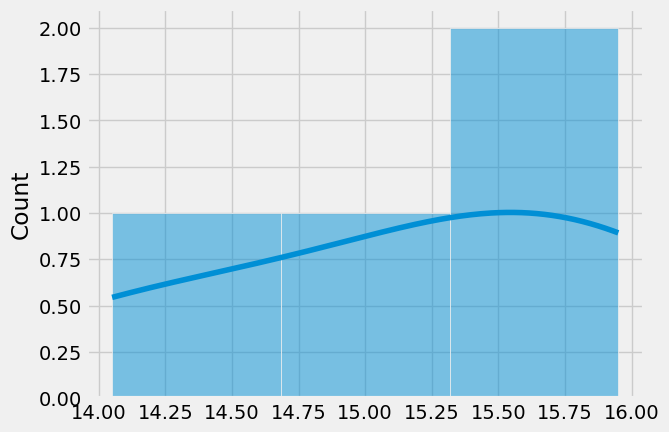

In [50]:
sns.histplot(mean_of_samples, kde=True)

In [52]:
population = np.random.binomial(10,0.5,10000)

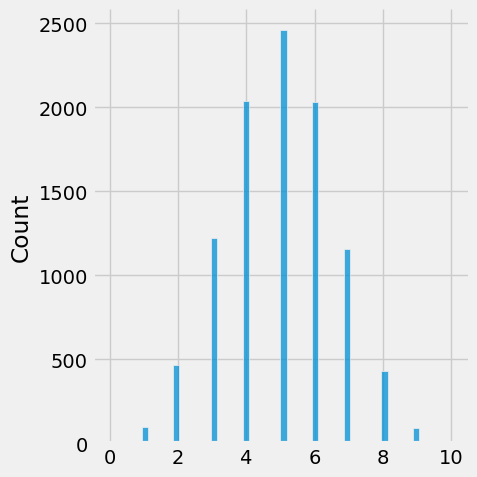

In [53]:
sns.displot(population)

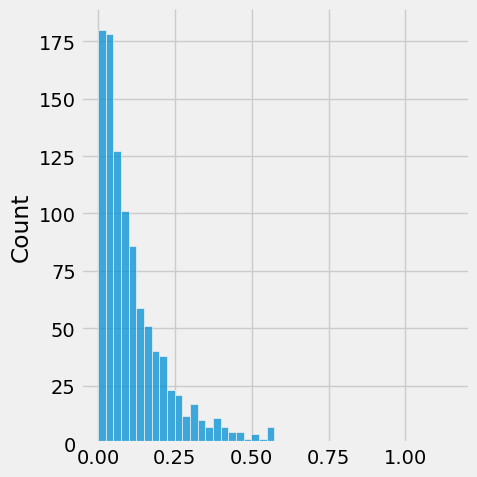

In [54]:
population = np.random.pareto(10,1000)
sns.displot(population)

<Axes: ylabel='Count'>

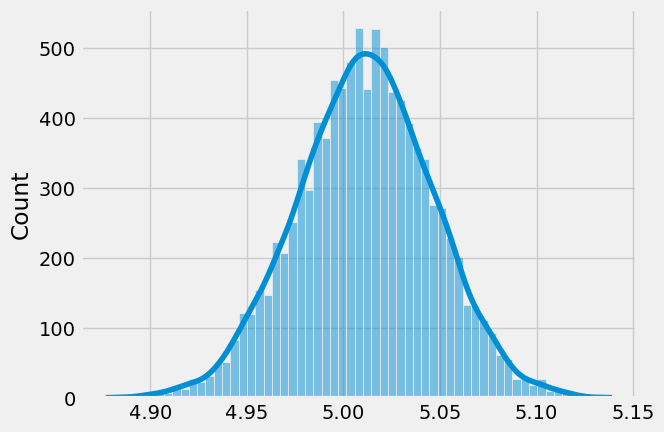

In [55]:
population = np.random.binomial(10,0.5,10000)
sample_size = 2000
mean_of_samples = []
for i in range(1,10000):
    sample = np.random.choice(population, size=sample_size)
    mean_of_samples.append(np.mean(sample))
sns.histplot(mean_of_samples, kde=True)


<Axes: ylabel='Density'>

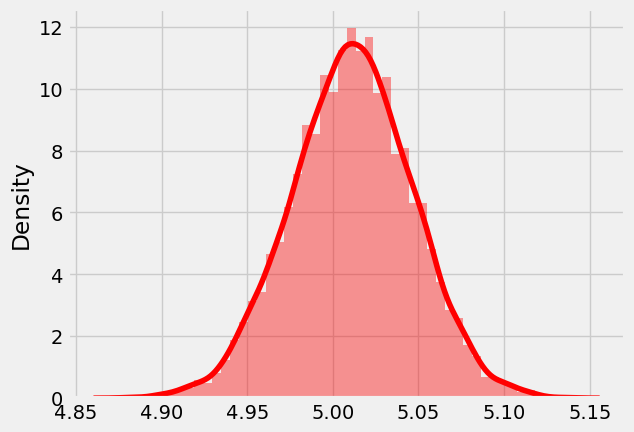

In [58]:
sns.distplot(mean_of_samples, kde=True, color='red')

* to prove it is a normal distribution, we will prove mean=mode=median

In [59]:
np.mean(mean_of_samples)

5.011166816681668

In [60]:
np.median(mean_of_samples)

5.0115

In [61]:
statistics.mode(mean_of_samples)

5.009

* hence mean = median = mode

### where x% data lies or one tail/two tail test

In [62]:
import scipy.stats as stats

In [67]:
# z table value
z_critical = stats.norm.ppf(q = 0.95)
# 0.95 is confidence interval
z_critical


1.6448536269514722

In [69]:
#  t table value
t_critical = stats.t.ppf(df = 24, q=0.95)
# df = degree of freedom
t_critical


1.7108820799094275

In [70]:
# z test
margin_of_error = z_critical * np.std(mean_of_samples)/np.sqrt(2000)
# to calculate confidence interval
margin_of_error

0.0013001783902310841

In [71]:
# confidence interval -
np.mean(mean_of_samples)-margin_of_error, np.mean(mean_of_samples)+margin_of_error

(5.009866638291437, 5.012466995071899)

In [77]:
#  z-test
from numpy.random import randn
population = randn(1000)
population

array([ 3.49035393e-01,  2.39260185e-01,  7.41001671e-01,  1.93147889e+00,
       -1.70703873e-01, -6.49844015e-01, -4.43298768e-01, -1.20588476e+00,
       -3.07201215e-01, -5.79228262e-01,  4.50952364e-01, -1.20527606e+00,
       -3.14805710e-01, -4.16549468e-01, -1.55935218e+00,  5.50816040e-01,
        2.31080584e+00,  3.13949395e-01, -1.80328350e+00,  1.31969085e+00,
       -6.78395760e-01, -8.60658936e-01, -8.82564350e-01,  4.15728929e-01,
        4.75773513e-01,  3.94221026e-01, -1.95343458e+00,  4.46209708e-01,
       -6.79690793e-01, -1.86178098e+00, -1.11679401e+00,  1.76691375e-01,
        1.27926769e-01,  2.00837084e+00, -1.20912425e+00,  4.20006577e-01,
        1.68101893e-02, -1.55052598e+00, -1.41171557e+00,  2.57257397e-01,
       -5.40106143e-01, -6.33369979e-02, -1.18638438e-01, -1.93248728e-01,
        3.01559441e-01, -3.82474084e-01,  2.05572894e-02,  1.88316330e-01,
       -1.68554642e-01,  3.16807471e-01, -1.16940632e+00, -1.03696902e+00,
       -5.75483059e-02,  

<Axes: ylabel='Density'>

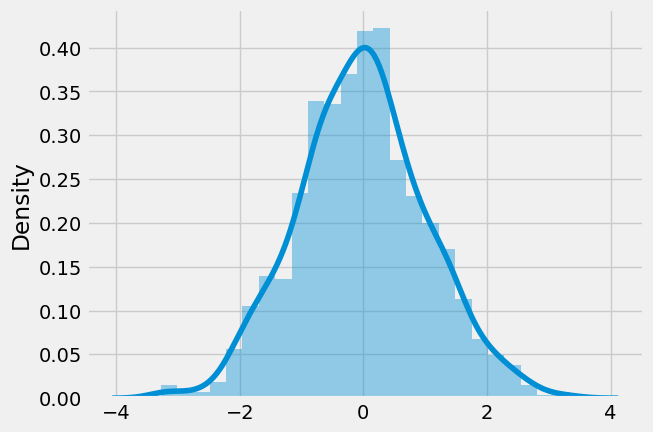

In [78]:
sns.distplot(population, kde = True)

In [79]:
np.mean(population),np.std(population), np.median(population), statistics.mode(population)

(-0.02146447378555258,
 1.039891003863952,
 -0.02902113839300125,
 0.3490353932285255)

In [81]:
# claim : h0 that mean = 0.05
null_mean = 0.05
# if p_value<= 0.05, reject H0 otherwise fail to reject H0

from statsmodels.stats.weightstats import ztest
zscore, pvalue = ztest(population, value= null_mean, alternative='larger')
# alternative - means opp of H0 i.e means is larger

In [82]:
zscore, pvalue

(-2.1721265458689585, 0.9850769404049667)

In [83]:
if pvalue<=0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

fail to reject null hypothesis


### school calculated IQ scores of 50 students, the avg IQ is 100. mean of population IQ is 90. std deviation = 16. State whether the claim by school that IQ increases is student study more than avg of school with 5% of significance level.
* H0 : mean_IQ = 90
* Ḥ1 : mean_IQ > 90

In [88]:
#  zcritical approach

import scipy.stats as stats

sample_mean = 100
population_mean = 90
population_std = 16
sample_size = 50 
alph = 0.05

zscore = (sample_mean-population_mean)/(population_std/np.sqrt(sample_size))
zscore

4.419417382415922

In [91]:
# using stats
# percent point concern - ppf (inverse of cdf cumulative distribution function)
# it will give you area
zcritical = stats.norm.ppf(1-alph)

In [92]:
if zscore>=zcritical:
    print('reject H0')
else :
    print('fail to reject H0')

reject H0


In [93]:
# p value approach using scipy
pvalue = 1- stats.norm.cdf(zscore)
pvalue

4.948367312573865e-06

In [95]:
if alph>=pvalue:
    print('reject H0')
else :
    print('fail to reject H0')

reject H0


### T-Test
* sample size<30
* OR
* population std is not given

* one smaple t test (wrt one independent sample)
* two smaple t test (wrt two independent sample)
* paired smaple t test (two samples from same population from different time interval)


In [97]:
#  one sample T-test

population = np.random.randint(10,50,50)
population

array([49, 21, 10, 17, 39, 42, 48, 12, 11, 39, 46, 36, 27, 18, 25, 29, 25,
       17, 12, 25, 47, 46, 18, 21, 34, 28, 21, 18, 14, 17, 25, 33, 35, 12,
       35, 13, 17, 14, 49, 25, 46, 22, 43, 42, 23, 32, 10, 11, 39, 13])

In [98]:
sample = np.random.choice(population, size = 20)
sample

array([18, 32, 17, 10, 48, 11, 11, 32, 49, 18, 17, 43, 46, 12, 36, 12, 17,
       11, 29, 21])

In [99]:
sample_mean = np.mean(sample)
sample_mean

24.5

In [102]:
# H0
null_value = 25
tvalue , pvalue = stats.ttest_1samp(sample, null_value)
tvalue , pvalue

(-0.16342551794520727, 0.8719092127610415)

In [103]:
if 0.05>=pvalue:
    print('reject H0')
else :
    print('fail to reject H0')

fail to reject H0


In [ ]:
#  two sample t-test
